In [1]:
import os  # Miscellaneous operating system interfaces
import pandas as pd  # Python data analysis library for working with data frames and basic analysis
import numpy as np
import matplotlib.pyplot as plt  # Plotting library
from scipy import (
    stats,
    optimize,
)  # packages for calculating statistics such as Pearson R and to calibrate your parameters
import xarray as xr


def db2lin(val):
    """
    Converting from linear to dB domain.

    Parameters
    ----------
    val : numpy.ndarray
        Values in dB domain.

    Returns
    -------
    val : numpy.ndarray
        Values in linear domain.
    """
    return 10 ** (val / 10.0)


def lin2db(val):
    """
    Converting from linear to dB domain.

    Parameters
    ----------
    val : numpy.ndarray
        Values in linear domain.

    Returns
    -------
    val : numpy.ndarray
        Values in dB domain.
    """
    return 10.0 * np.log10(val)


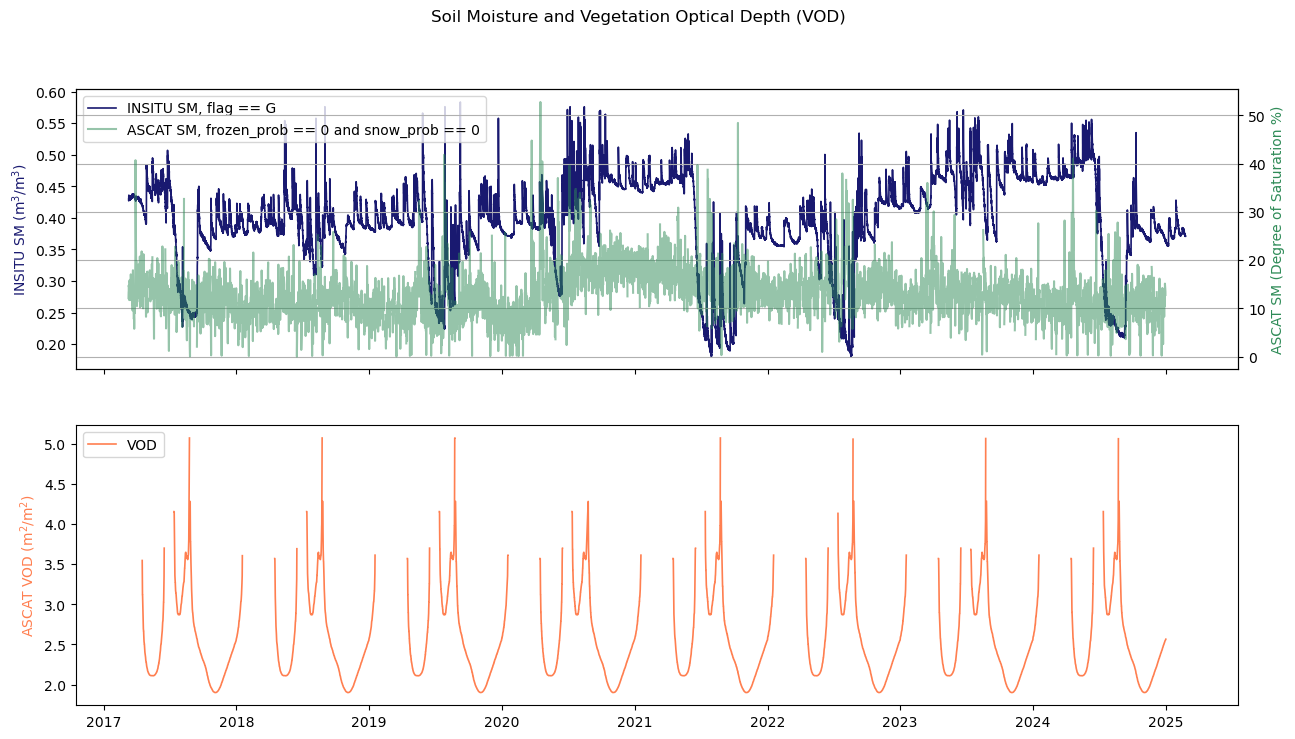

In [3]:
merged_ds = xr.open_zarr("merged_soilmoisture_vod.zarr")

# Extract relevant variables
insitu_sm = merged_ds["SM_insitu"]  # In-Situ Soil Moisture
ascat_sm = merged_ds["SM_ascat"]  # ASCAT Soil Moisture
vod = merged_ds["vod"]  # ASCAT VOD
time = merged_ds["date_time"]  # Time dimension


fig, axs = plt.subplots(2, 1, figsize=(15, 8), sharex=True)

ax1 = axs[0]
ax2 = ax1.twinx()

lns1 = ax1.plot(
    time, insitu_sm, label="INSITU SM, flag == G", color="midnightblue", lw=1.2
)
lns2 = ax2.plot(
    time,
    ascat_sm,
    label="ASCAT SM, frozen_prob == 0 and snow_prob == 0",
    color="seagreen",
    alpha=0.5,
)

ax1.set_ylabel(r"INSITU SM (m$^3$/m$^3$)", color="midnightblue")
ax2.set_ylabel("ASCAT SM (Degree of Saturation %)", color="seagreen")

lns = lns1 + lns2  # Combine legends
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="upper left")

ax3 = axs[1]
ax3.plot(time, vod, label="VOD", color="coral", lw=1.2)

ax3.set_ylabel(r"ASCAT VOD (m$^2$/m$^2$)", color="coral")
ax3.legend(loc="upper left")

plt.xlabel("Time")
plt.suptitle("Soil Moisture and Vegetation Optical Depth (VOD)")
plt.grid()
plt.show()
